In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import spacy
import re
import spacy.cli
spacy.cli.download('es_core_news_lg')
nlp = spacy.load('es_core_news_lg')
import  nltk
print(nltk.__version__)
import pickle
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
3.7


In [3]:
import keras.utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers import Conv1D, GlobalMaxPooling1D, GlobalMaxPool1D
from keras.layers import LSTM
from keras.utils import pad_sequences
from keras.layers import Dense, Embedding
from keras.layers import SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras import Model
from keras.utils import to_categorical
from keras.utils import pad_sequences 


In [5]:
with open ('/content/drive/MyDrive/Progetto_TA_2022/pickled_df/df_es.pkl', mode='br') as inputfile:
  df_es = pickle.load(inputfile)

In [6]:
df_es

,Artist,Song,Genre,Language,Lyrics
1074,aerosmith,i don't want to miss a thing (traducción),Rock,es,podría permanecer despierto sólo para escuchar...
1093,aerosmith,ain't that a bitch (traducción),Rock,es,esfumado has perdido otro amante mientras le d...
1096,aerosmith,amazing (traducción),Rock,es,yo rechazaba las cosas correctas y aceptaba la...
1158,aerosmith,fly away from here (traducción),Rock,es,tengo que encontrar un camino sí no puedo espe...
1181,aerosmith,i don't want to miss a thing (traducción),Rock,es,podría permanecer despierto sólo para escuchar...
...,...,...,...,...,...
280480,conjunto atardecer,mudan eca ojos de miel,Folk,es,es que el amor es asi asi asi hoy debes llorar...
283371,amistades peligrosas,hagase tu voluntad,Pop,es,empieza tu por mi me has encendido bien demues...
284118,daf,y la gracia,Electronic,es,para bailar la bamba para bailar la bamba se n...
287619,eden s crush,mil palabras,Pop,es,ooh ooh yeah ooh yeah yeah oh yeah yeah baby b...


In [7]:
df_es.shape

(3892, 5)

In [16]:
df_es['Genre'].value_counts() 

Pop           3042
Rock           755
Metal           65
Indie           10
Folk             8
Jazz             6
Electronic       3
R&B              2
Hip-Hop          1
Name: Genre, dtype: int64

In [8]:
categories3 = ['Rock', 'Pop', 'Metal']

df_es_3 = df_es[df_es['Genre'].isin(categories3)]

In [9]:
df_es_3

,Artist,Song,Genre,Language,Lyrics
1074,aerosmith,i don't want to miss a thing (traducción),Rock,es,podría permanecer despierto sólo para escuchar...
1093,aerosmith,ain't that a bitch (traducción),Rock,es,esfumado has perdido otro amante mientras le d...
1096,aerosmith,amazing (traducción),Rock,es,yo rechazaba las cosas correctas y aceptaba la...
1158,aerosmith,fly away from here (traducción),Rock,es,tengo que encontrar un camino sí no puedo espe...
1181,aerosmith,i don't want to miss a thing (traducción),Rock,es,podría permanecer despierto sólo para escuchar...
...,...,...,...,...,...
271399,ana gabriel,tu me acostumbraste,Pop,es,tu me acostumbraste a todas esas cosas y tu me...
271400,ana gabriel,historia de un amor,Pop,es,ya no estas mas a mi lado corazon y en el alma...
272760,eels,mystery of life,Rock,es,how does a little baby know how to smile how d...
283371,amistades peligrosas,hagase tu voluntad,Pop,es,empieza tu por mi me has encendido bien demues...


In [10]:
labels = df_es_3['Genre'].unique()

Text(0.5, 1.0, 'Distribuzione Classi')

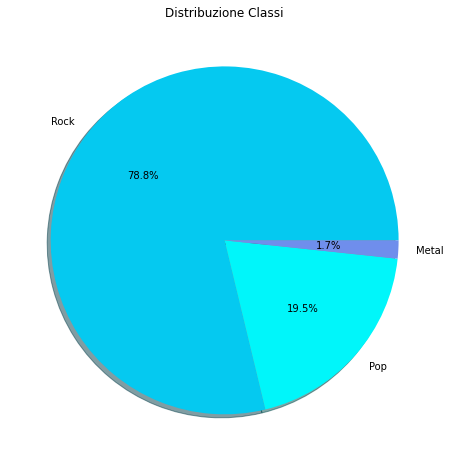

In [11]:
plt.rcParams["figure.figsize"] = [12,8]
colors = ['#05c9f0', '#00f6fa', '#6f8eec', '#b2d5f0', '#075997']
plt.pie(df_es_3['Genre'].value_counts(), labels =labels, autopct = '%1.1f%%',colors = colors, shadow = True)
plt.title('Distribuzione Classi')

#Splitting the dataset in training set and test set

In [12]:
import sklearn
from sklearn.model_selection import train_test_split

In [13]:
es_train, es_test = sklearn.model_selection.train_test_split(df_es_3, test_size=0.20, train_size=0.80)

In [14]:
es_train.shape

(3089, 5)

In [15]:
es_test.shape

(773, 5)

In [17]:
es_test['Genre'].value_counts() 

Pop      602
Rock     154
Metal     17
Name: Genre, dtype: int64

In [18]:
es_train['Genre'].value_counts() 

Pop      2440
Rock      601
Metal      48
Name: Genre, dtype: int64

#Tokenizing the lyrics with spacy

In [19]:
x_train = es_train['Lyrics'].tolist()
y_train = es_train['Genre'].tolist()

In [20]:
x_test = es_test['Lyrics'].tolist()
y_test = es_test['Genre'].tolist()

In [21]:
len(x_train), len(y_train), len(x_test), len(y_test)

(3089, 3089, 773, 773)

In [22]:
set(y_train)

{'Metal', 'Pop', 'Rock'}

In [23]:
sample_idx = 1345
x_train[sample_idx]

'escurrire como miel en hielo como velo en fuego asi te hare venir a mi asi te hare buscarme a mi sere intocable al despertar promesa vana eterno parece asi te hare creer en mi asi te hare desearme asi si quiero estar donde creo desear sere por siempre sueno de sombras si quiero estar donde creo desear sere por siempre sueno de sombras sembrar en ti la duda cambio de parecer cada minuto incierta en forma de ser asi te hare buscarme asi te hare venir a mi asi te hare desearme al fin si quiero estar donde creo desear sere por siempre sueno de sombras'

In [24]:
y_train[sample_idx]

'Rock'

In [25]:
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize, pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

stopword_list = stopwords.words('spanish')
punctuations = string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [26]:
def spacy_tokenizer (text):
   
    doc = nlp(text)

    #lemmatizing tokens and lowering case
    lemmas = [token.lemma_.lower() for token in doc]

    #removing stopwords and punctuations
    lemmas_stop= [token for token in lemmas if token not in stopword_list and token not in punctuations]  

    lemma_bigrams = ['BI_'+p1+'_'+p2 for p1,p2 in nltk.ngrams(lemmas_stop,2)]
    lemma_trigrams = ['TRI_'+p1+'_'+p2+'_'+p3 for p1,p2,p3 in nltk.ngrams(lemmas_stop,3)] 
    
    all_tokens = list()
    all_tokens.extend(lemmas_stop)
    all_tokens.extend(lemma_bigrams)
    all_tokens.extend(lemma_trigrams)
    return all_tokens

In [27]:
vectors = CountVectorizer (analyzer = spacy_tokenizer, min_df = 2)

In [28]:
print ('fit')
vectors.fit(x_train)
print('transform')
x_train_tok = vectors.transform(x_train)
x_test_tok = vectors.transform(x_test)
print ('done')

fit
transform
done


In [29]:
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/es3_x_train_tok.pkl', 'wb') as outfile:
  pickle.dump(x_train_tok, outfile)
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/es3_x_test_tok.pkl', 'wb') as outfile:
  pickle.dump(x_test_tok, outfile)

In [30]:
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/es3_x_train_tok.pkl', mode = 'br') as infile:
  x_train_tok = pickle.load(infile)
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/es3_x_test_tok.pkl', mode = 'br') as infile:
  x_test_tok = pickle.load(infile)

#SVM Classification - 3 classes

---






Classification report:
              precision    recall  f1-score   support

       Metal       1.00      0.06      0.11        17
         Pop       0.84      0.95      0.89       602
        Rock       0.63      0.38      0.48       154

    accuracy                           0.82       773
   macro avg       0.82      0.46      0.49       773
weighted avg       0.80      0.82      0.79       773

Confusion matrix:
[[  1  14   2]
 [  0 570  32]
 [  0  95  59]]


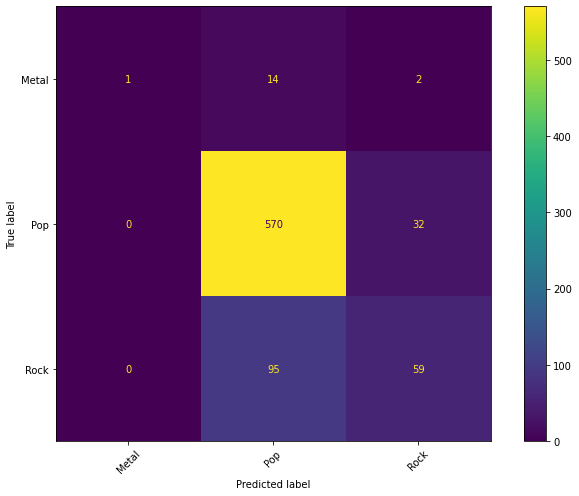

In [37]:
svm_pipeline = Pipeline([
    ('vect', CountVectorizer(min_df = 2)), #tokenization
    ('sel', SelectKBest(chi2, k=3000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

svm_pipeline.fit(x_train,y_train)
predictions = svm_pipeline.predict(x_test)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

ConfusionMatrixDisplay.from_estimator(svm_pipeline, x_test, y_test)  
plt.xticks(rotation=45)
plt.show()

In [38]:
opt_pipeline = Pipeline([
    ('sel', SelectKBest(chi2)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

param_grid = [{'sel__k': [1000, 2000, 3000,'all'], 'learner__C': [0.01, 0.1, 1, 10, 100]}]
SVM_opt_search = GridSearchCV(opt_pipeline, param_grid, cv=None, n_jobs = 3, verbose=True).fit(x_train_tok,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [39]:
SVM_opt_search.best_params_

{'learner__C': 10, 'sel__k': 'all'}

In [40]:
SVM_opt_search.best_estimator_

Pipeline(steps=[('sel',
                 SelectKBest(k='all',
                             score_func=<function chi2 at 0x7f2ea07ade60>)),
                ('tfidf', TfidfTransformer()), ('learner', LinearSVC(C=10))])

In [41]:
opt_predictions = SVM_opt_search.best_estimator_.predict(x_test_tok)

print('Classification report:')
print(classification_report(y_test, opt_predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, opt_predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

       Metal       1.00      0.06      0.11        17
         Pop       0.86      0.96      0.91       602
        Rock       0.74      0.47      0.58       154

    accuracy                           0.84       773
   macro avg       0.87      0.50      0.53       773
weighted avg       0.84      0.84      0.82       773

Confusion matrix:
[[  1  15   1]
 [  0 578  24]
 [  0  81  73]]


# Random Forest Classification - 3 classes

---




In [42]:
RF_pipeline = Pipeline([
    ('sel', SelectKBest(chi2, k=3000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', RandomForestClassifier())  # learning algorithm
])

RF_pipeline.fit(x_train_tok,y_train)
predictions = RF_pipeline.predict(x_test_tok)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

       Metal       1.00      0.06      0.11        17
         Pop       0.84      0.99      0.91       602
        Rock       0.89      0.33      0.48       154

    accuracy                           0.84       773
   macro avg       0.91      0.46      0.50       773
weighted avg       0.85      0.84      0.81       773

Confusion matrix:
[[  1  14   2]
 [  0 598   4]
 [  0 103  51]]


#LSTM Classification - 3 classes

---



---



In [43]:
es_train['Genre_number'] = es_train['Genre']

numbers = []

for i in es_train['Genre']:
  if i == 'Rock':
    numbers.append(0)

  if i == 'Pop':
    numbers.append(1)
  
  elif i == 'Metal':
    numbers.append(2)
  
  

In [44]:
es_train['Genre_number'] = numbers

In [45]:
es_test['Genre_number'] = es_test['Genre']

numbers_test = []

for i in es_test['Genre']:
  if i == 'Rock':
    numbers_test.append(0)

  if i == 'Pop':
    numbers_test.append(1)
  
  elif i == 'Metal':
    numbers_test.append(2)
  

In [46]:
es_test['Genre_number'] = numbers_test

In [47]:
y_train = es_train['Genre_number'] #substituting the columns in the variables
y_test = es_test['Genre_number']

In [48]:
y_train = to_categorical(y_train,3)  #converting to one-hot vectors
y_test = to_categorical(y_test, 3)

In [49]:
y_train.shape, y_test.shape

((3089, 3), (773, 3))

In [50]:
#max number of words to be used
max_features = 20000

#fixed size
embed_size = 128

batch_size = 64
epochs = 10

tokenizer = Tokenizer(num_words=max_features, lower=True)
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)

X_train_final = pad_sequences(list_tokenized_train, maxlen=200) #maxlen=max number of words in each lyrics
X_test_final = pad_sequences(list_tokenized_test, maxlen=200)

In [51]:
X_train_final.shape, y_train.shape

((3089, 200), (3089, 3))

In [52]:
X_test_final.shape, y_test.shape

((773, 200), (773, 3))

In [53]:
model = Sequential()
model.add(Embedding(max_features, embed_size))
model.add(LSTM(10, dropout=0.4, recurrent_dropout=0.4))
model.add(Dropout(0.4))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 10)                5560      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 12)                132       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dropout_2 (Dropout)         (None, 12)                0

In [54]:
lstm3 = model.fit(X_train_final, y_train,
                 batch_size=batch_size, 
                 epochs=epochs, 
                 shuffle = True, 
                 validation_split=0.2, 
                 callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
lstm3

Epoch 1/10
39/39 [==============================] - 15s 284ms/step - loss: 0.8086 - accuracy: 0.7766 - val_loss: 0.6384 - val_accuracy: 0.7799
Epoch 2/10
39/39 [==============================] - 10s 266ms/step - loss: 0.6537 - accuracy: 0.7924 - val_loss: 0.6147 - val_accuracy: 0.7799
Epoch 3/10
39/39 [==============================] - 10s 261ms/step - loss: 0.6231 - accuracy: 0.7924 - val_loss: 0.6024 - val_accuracy: 0.7799
Epoch 4/10
39/39 [==============================] - 14s 363ms/step - loss: 0.6112 - accuracy: 0.7924 - val_loss: 0.5969 - val_accuracy: 0.7799
Epoch 5/10
39/39 [==============================] - 11s 271ms/step - loss: 0.6028 - accuracy: 0.7924 - val_loss: 0.5925 - val_accuracy: 0.7799
Epoch 6/10
39/39 [==============================] - 10s 263ms/step - loss: 0.5959 - accuracy: 0.7924 - val_loss: 0.5907 - val_accuracy: 0.7799
Epoch 7/10
39/39 [==============================] - 10s 260ms/step - loss: 0.5826 - accuracy: 0.7924 - val_loss: 0.5883 - val_accuracy: 0.7799

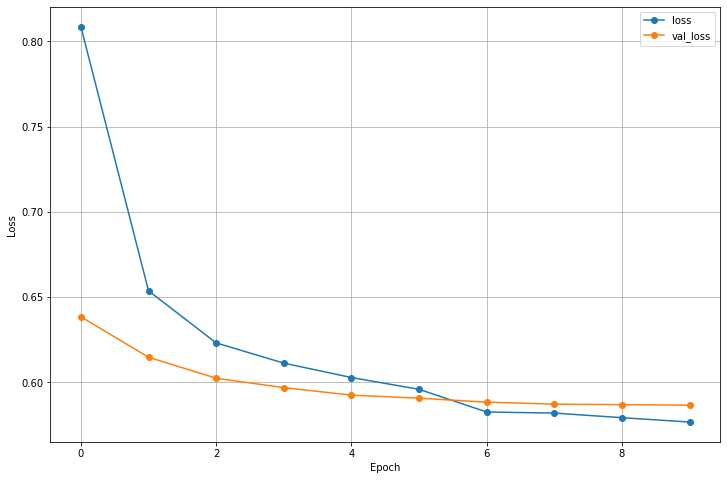

In [55]:
plt.plot(lstm3.history['loss'], label='loss', marker = 'o')
plt.plot(lstm3.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing LSTM Classification

In [56]:
lstm3_pred = np.round(model.predict(X_test_final))

25/25 [==============================] - 1s 27ms/step


In [57]:
print('Accuracy %s' % accuracy_score(y_test, lstm3_pred))
print('F1-score %s' % f1_score(y_test, lstm3_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm3_pred, zero_division=1))

Accuracy 0.7787839586028461
F1-score [0.         0.87563636 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       154
           1       0.78      1.00      0.88       602
           2       1.00      0.00      0.00        17

   micro avg       0.78      0.78      0.78       773
   macro avg       0.93      0.33      0.29       773
weighted avg       0.83      0.78      0.68       773
 samples avg       0.78      0.78      0.78       773



#CNN Classification

In [58]:
#max number of words to be used
max_features = 20000
#fixed size
embed_size = 128

batch_size = 64
epochs = 20
filters = 10
kernel_size = 3
hidden_dims = 10

tokenizer = Tokenizer(num_words=max_features, lower=True)
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)

X_train_final = pad_sequences(list_tokenized_train, maxlen=200)
X_test_final = pad_sequences(list_tokenized_test, maxlen=200)

In [59]:
model = Sequential()

model.add(Embedding(max_features, embed_size))
model.add(Dropout(0.4))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())

#vanilla dense layer
model.add(Dense(hidden_dims))
model.add(Dropout(0.4))
model.add(Activation('relu'))

#vanilla dense layer
model.add(Dense(hidden_dims))
model.add(Dropout(0.4))
model.add(Activation('relu'))

#output layer
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 dropout_3 (Dropout)         (None, None, 128)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 10)          3850      
                                                                 
 global_max_pooling1d (Globa  (None, 10)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                      

In [60]:
cnn3= model.fit(X_train_final, y_train, 
          batch_size = batch_size, 
          epochs=epochs, 
          shuffle=True, 
          validation_split=0.1,
          callbacks= [EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/20
44/44 [==============================] - 4s 80ms/step - loss: 0.8149 - accuracy: 0.7651 - val_loss: 0.6453 - val_accuracy: 0.7864
Epoch 2/20
44/44 [==============================] - 3s 71ms/step - loss: 0.6388 - accuracy: 0.7903 - val_loss: 0.6076 - val_accuracy: 0.7864
Epoch 3/20
44/44 [==============================] - 3s 70ms/step - loss: 0.6087 - accuracy: 0.7903 - val_loss: 0.5950 - val_accuracy: 0.7864
Epoch 4/20
44/44 [==============================] - 3s 66ms/step - loss: 0.5972 - accuracy: 0.7903 - val_loss: 0.5900 - val_accuracy: 0.7864
Epoch 5/20
44/44 [==============================] - 3s 70ms/step - loss: 0.5917 - accuracy: 0.7903 - val_loss: 0.5876 - val_accuracy: 0.7864
Epoch 6/20
44/44 [==============================] - 3s 73ms/step - loss: 0.5909 - accuracy: 0.7903 - val_loss: 0.5862 - val_accuracy: 0.7864
Epoch 7/20
44/44 [==============================] - 3s 67ms/step - loss: 0.5852 - accuracy: 0.7903 - val_loss: 0.5860 - val_accuracy: 0.7864
Epoch 8/20
44

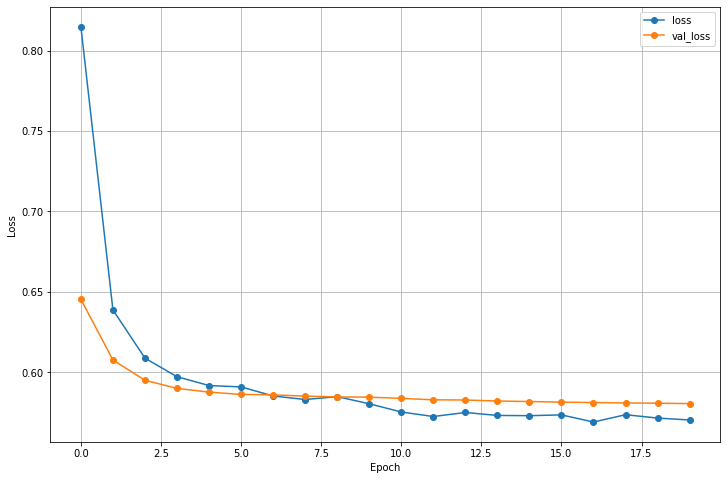

In [61]:
plt.plot(cnn3.history['loss'], label='loss', marker = 'o')
plt.plot(cnn3.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing CNN Classification

In [62]:
cnn3_pred = np.round(model.predict(X_test_final))

25/25 [==============================] - 0s 8ms/step


In [63]:
print('Accuracy %s' % accuracy_score(y_test, cnn3_pred))
print('F1-score %s' % f1_score(y_test, cnn3_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn3_pred, zero_division=1))

Accuracy 0.7787839586028461
F1-score [0.         0.87563636 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       154
           1       0.78      1.00      0.88       602
           2       1.00      0.00      0.00        17

   micro avg       0.78      0.78      0.78       773
   macro avg       0.93      0.33      0.29       773
weighted avg       0.83      0.78      0.68       773
 samples avg       0.78      0.78      0.78       773



#Classification with Word2Vec

In [64]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [65]:
pip install --upgrade gensim


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 2.7 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [66]:
import gensim
from gensim.models import Word2Vec

In [67]:
df_es_3['Genre_number'] = df_es_3['Genre'] #converting the strings into int in the Genre column

numbers = []
for i in df_es_3['Genre']:
  if i == 'Rock':
    numbers.append(0)
  
  if i == 'Pop':
    numbers.append(1)
  
  elif i == 'Metal':
   numbers.append(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
df_es_3['Genre_number'] = numbers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
#Gensim word2vec requires sentences in input so i split the lyrics into sentences
sentence_splitter = nltk.data.load('tokenizers/punkt/spanish.pickle')
sentences =[]
sum=0
for lyrics in df_es_3['Lyrics']:
  sents = sentence_splitter.tokenize(lyrics.strip())
  sum+=len(sents)
  for sent in sents:
    sentences.append(sent.split())
print(sum)
print(len(sentences))

3862
3862


In [70]:
#checking that the sentences are in the correct format
for sent in sentences[:5]:
  print(sent, "\n")

['podría', 'permanecer', 'despierto', 'sólo', 'para', 'escucharte', 'respirar', 'mirarte', 'sonreír', 'mientras', 'duermes', 'a', 'lo', 'lejos', 'y', 'soñando', 'podría', 'pasar', 'mi', 'vida', 'en', 'esta', 'dulce', 'claudicación', 'podría', 'quedarme', 'perdido', 'en', 'este', 'momento', 'para', 'siempre', 'ya', 'que', 'cada', 'momento', 'que', 'pasé', 'contigo', 'es', 'un', 'momento', 'que', 'valoro', 'mucho', 'no', 'quiero', 'cerrar', 'los', 'ojos', 'no', 'quiero', 'quedarme', 'dormido', 'porque', 'te', 'extrañaría', 'nena', 'y', 'no', 'quiero', 'extrañar', 'nada', 'porque', 'aún', 'si', 'soñara', 'contigo', 'el', 'más', 'dulce', 'de', 'los', 'sueños', 'no', 'alcanzará', 'aún', 'así', 'te', 'extrañaría', 'nena', 'y', 'no', 'quiero', 'extrañar', 'nada', 'acostado', 'cerca', 'de', 'ti', 'siento', 'latir', 'tu', 'corazón', 'y', 'me', 'pregunto', 'con', 'qué', 'estás', 'soñando', 'me', 'pregunto', 'si', 'será', 'conmigo', 'luego', 'beso', 'tus', 'ojos', 'y', 'agradezco', 'a', 'dios', '

In [71]:
#creating the w2v embeddings
w2v_model=gensim.models.Word2Vec(sentences=sentences, vector_size=300, window=10, min_count=1)

In [72]:
w2v_model.train(sentences, epochs=10, total_examples=len(sentences))

(6432879, 8860090)

In [73]:
#total num of extracted words
vocab = w2v_model.wv.index_to_key
print("Total number of words: ", len(vocab))

Total number of words:  30578


In [74]:
w2v_model.wv.most_similar('mirarte')

[('quererte', 0.5805926322937012),
 ('amarte', 0.5449045300483704),
 ('hacerte', 0.5421838164329529),
 ('pensarte', 0.5124887228012085),
 ('basto', 0.4992925226688385),
 ('tenerte', 0.4930897653102875),
 ('poder', 0.48532387614250183),
 ('acercarme', 0.4793183207511902),
 ('nací', 0.4724076986312866),
 ('derramar', 0.47043800354003906)]

In [75]:
#creating a dictionary with words in vocab and their embeddings. It will be used to create the embedding matrix 

word_vec_dict={}

for word in vocab:
  word_vec_dict[word]=w2v_model.wv.get_vector(word)

len(word_vec_dict)

30578

In [76]:
#finding the max length of the lyrics
maxi = -1
for i, lyrics in enumerate(df_es_3['Lyrics']):
  tokens=lyrics.split()
  if(len(tokens)>maxi):
    maxi=len(tokens)

print(maxi)

1172


In [77]:
#integer encoding the words in the lyrics using Keras Tokenizer
tok=Tokenizer()
tok.fit_on_texts(df_es_3['Lyrics'])
vocab_size = len(tok.word_index) +1
encoded_lyrics = tok.texts_to_sequences(df_es_3['Lyrics'])

In [78]:
max_lyrics_len=maxi
embed_dim = 300

#padding every sequence to the max length
padded_lyrics=pad_sequences(encoded_lyrics, maxlen=max_lyrics_len, padding='post')
padded_lyrics.shape

(3862, 1172)

In [79]:
vocab_size

30550

In [80]:
#creating the embedding matrix
embed_matrix = np.zeros(shape=(vocab_size, embed_dim))
for word, i in tok.word_index.items():
  embed_vector=word_vec_dict.get(word)
  if embed_vector is not None: #if the word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector
    #if the word is not found, the vector corresponding to the embedding will be filled with zeros

In [81]:
Y= to_categorical(df_es_3['Genre_number'], 3) #transforming the labels into one hot vectors
x_train,x_test,y_train,y_test=train_test_split(padded_lyrics, Y,test_size=0.20,random_state=42)

In [82]:
y_train.shape, y_test.shape

((3089, 3), (773, 3))

#LSTM Classification with Word2vec - 3 classes

In [83]:
from keras.initializers import Constant


In [84]:
epochs=5
batch_size=64

In [85]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_lyrics_len, trainable = False, embeddings_initializer=Constant(embed_matrix)))
model.add(LSTM(12, dropout=0.4, recurrent_dropout=0.4))
model.add(Dropout(0.4))
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1, momentum=0.8), metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1172, 300)         9165000   
                                                                 
 lstm_1 (LSTM)               (None, 12)                15024     
                                                                 
 dropout_6 (Dropout)         (None, 12)                0         
                                                                 
 dense_6 (Dense)             (None, 24)                312       
                                                                 
 dropout_7 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 3)                 75        
                                                                 
Total params: 9,180,411
Trainable params: 15,411
Non-t

In [86]:
lstm3_w2v = model.fit(x_train,
                     y_train,
                     epochs=epochs,
                     batch_size=batch_size,
                     shuffle = True, 
                     validation_split=0.2, 
                     callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
39/39 [==============================] - 109s 3s/step - loss: 0.6547 - accuracy: 0.7693 - val_loss: 0.5313 - val_accuracy: 0.8204
Epoch 2/5
39/39 [==============================] - 95s 2s/step - loss: 0.5803 - accuracy: 0.7875 - val_loss: 0.5291 - val_accuracy: 0.8204
Epoch 3/5
39/39 [==============================] - 93s 2s/step - loss: 0.5777 - accuracy: 0.7875 - val_loss: 0.5256 - val_accuracy: 0.8204
Epoch 4/5
39/39 [==============================] - 93s 2s/step - loss: 0.5784 - accuracy: 0.7875 - val_loss: 0.5230 - val_accuracy: 0.8204
Epoch 5/5
39/39 [==============================] - 98s 3s/step - loss: 0.5787 - accuracy: 0.7875 - val_loss: 0.5280 - val_accuracy: 0.8204


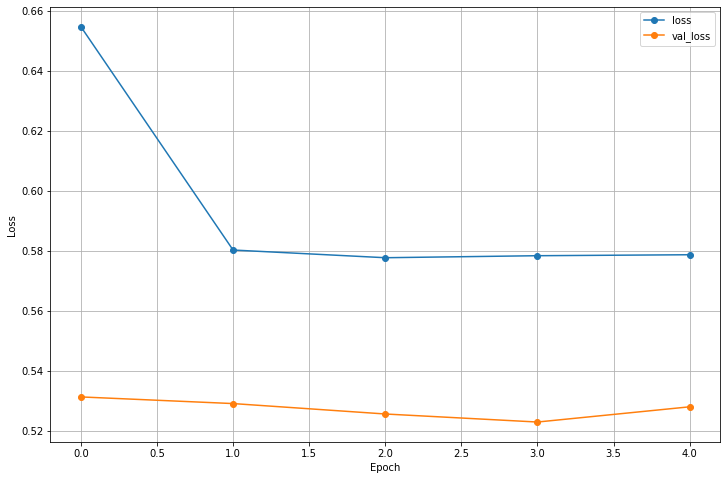

In [87]:
plt.plot(lstm3_w2v.history['loss'], label='loss', marker = 'o')
plt.plot(lstm3_w2v.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing LSTM CLassification with w2v

In [88]:
lstm3W2V_pred = np.round(model.predict(x_test))

25/25 [==============================] - 5s 174ms/step


In [89]:
print('Accuracy %s' % accuracy_score(y_test, lstm3W2V_pred))
print('F1-score %s' % f1_score(y_test, lstm3W2V_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm3W2V_pred, zero_division=1))

Accuracy 0.7619663648124192
F1-score [0.         0.86490455 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       169
           1       0.76      1.00      0.86       589
           2       1.00      0.00      0.00        15

   micro avg       0.76      0.76      0.76       773
   macro avg       0.92      0.33      0.29       773
weighted avg       0.82      0.76      0.66       773
 samples avg       0.76      0.76      0.76       773



#CNN Classification with Word2Vec - 3 classes

In [90]:
filters=10
kernel_size=3
epochs=20

In [91]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_lyrics_len, trainable= False, embeddings_initializer=Constant(embed_matrix)))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1172, 300)         9165000   
                                                                 
 conv1d_1 (Conv1D)           (None, 1170, 10)          9010      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 10)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                352       
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                      

In [92]:
cnn3_w2v = model.fit(x_train,
                     y_train,
                     epochs=epochs,
                     batch_size=batch_size,
                     shuffle = True, 
                     validation_split=0.2, 
                     callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/20
39/39 [==============================] - 14s 346ms/step - loss: 0.9555 - accuracy: 0.7357 - val_loss: 0.5448 - val_accuracy: 0.8204
Epoch 2/20
39/39 [==============================] - 13s 330ms/step - loss: 0.6147 - accuracy: 0.7803 - val_loss: 0.5329 - val_accuracy: 0.8204
Epoch 3/20
39/39 [==============================] - 13s 341ms/step - loss: 0.5966 - accuracy: 0.7851 - val_loss: 0.5325 - val_accuracy: 0.8204
Epoch 4/20
39/39 [==============================] - 13s 330ms/step - loss: 0.5925 - accuracy: 0.7859 - val_loss: 0.5478 - val_accuracy: 0.8204
Epoch 5/20
39/39 [==============================] - 13s 336ms/step - loss: 0.5692 - accuracy: 0.7867 - val_loss: 0.5272 - val_accuracy: 0.8204
Epoch 6/20
39/39 [==============================] - 13s 332ms/step - loss: 0.5698 - accuracy: 0.7871 - val_loss: 0.5383 - val_accuracy: 0.8204
Epoch 7/20
39/39 [==============================] - 13s 332ms/step - loss: 0.5588 - accuracy: 0.7871 - val_loss: 0.5319 - val_accuracy: 0.8204

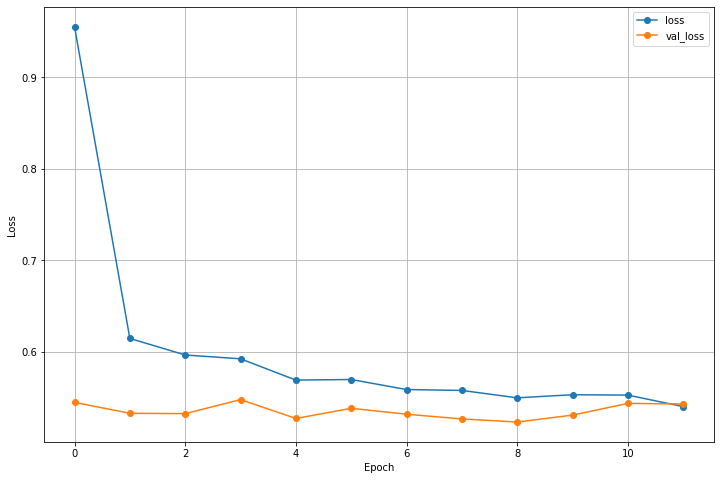

In [93]:
plt.plot(cnn3_w2v.history['loss'], label='loss', marker = 'o')
plt.plot(cnn3_w2v.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing CNN Classification with w2v

In [94]:
cnn3W2V_pred = np.round(model.predict(x_test))

25/25 [==============================] - 1s 47ms/step


In [95]:
print('Accuracy %s' % accuracy_score(y_test, cnn3W2V_pred))
print('F1-score %s' % f1_score(y_test, cnn3W2V_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn3W2V_pred, zero_division=1))

Accuracy 0.7619663648124192
F1-score [0.         0.86554004 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       169
           1       0.76      1.00      0.87       589
           2       1.00      0.00      0.00        15

   micro avg       0.76      0.76      0.76       773
   macro avg       0.92      0.33      0.29       773
weighted avg       0.82      0.76      0.66       773
 samples avg       0.76      0.76      0.76       773

